Exercise for b

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [9]:
df = pd.read_csv('gapminder.csv')
df.head()

,Unnamed: 0,country,year,population,cont,life_exp,gdp_cap
0,11,Afghanistan,2007,31889923.0,Asia,43.828,974.580338
1,23,Albania,2007,3600523.0,Europe,76.423,5937.029526
2,35,Algeria,2007,33333216.0,Africa,72.301,6223.367465
3,47,Angola,2007,12420476.0,Africa,42.731,4797.231267
4,59,Argentina,2007,40301927.0,Americas,75.320,12779.379640


In [3]:
df.keys()

Index(['Unnamed: 0', 'country', 'year', 'population', 'cont', 'life_exp',
       'gdp_cap'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  142 non-null    int64  
 1   country     142 non-null    object 
 2   year        142 non-null    int64  
 3   population  142 non-null    float64
 4   cont        142 non-null    object 
 5   life_exp    142 non-null    float64
 6   gdp_cap     142 non-null    float64
dtypes: float64(3), int64(2), object(2)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum()

Unnamed: 0    0
country       0
year          0
population    0
cont          0
life_exp      0
gdp_cap       0
dtype: int64

Exploring the data set:

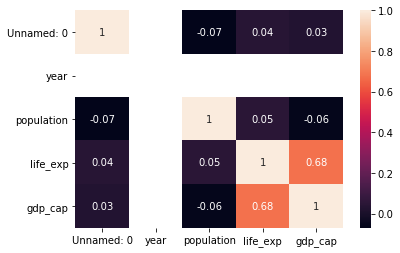

In [5]:
import seaborn as sns
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [18]:
X = df.drop('life_exp',axis=1).values # drop the target
y = df['life_exp'].values #keep the target

In [19]:
X_cap = X[:,5] #since cap is the 5th col in the dataset

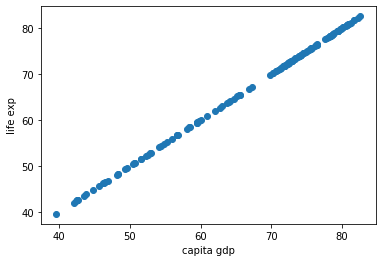

In [21]:
import matplotlib.pyplot as plt
plt.scatter(X_exp,y)
plt.ylabel('life exp')
plt.xlabel('capita gdp')
plt.show()

0.46058265137904886


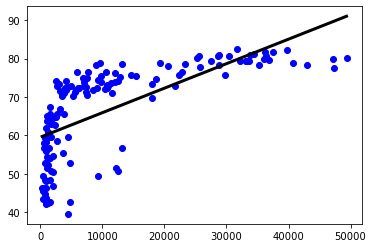

In [23]:
import numpy as np
from sklearn.linear_model import LinearRegression
# Reshape X and y
y = y.reshape(-1,1)
X_cap = X_cap.reshape(-1,1)
reg = LinearRegression()
reg.fit(X_cap, y)
prediction_space = np.linspace(min(X_cap),max(X_cap)).reshape(-1,1)
print(reg.score(X_cap,y))
plt.scatter(X_cap,y,color ='blue')
plt.plot(prediction_space, reg.predict(prediction_space),color ='black', linewidth =3)

In [27]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_cap, y, test_size = 0.3, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print R^2 and RMSE
print("R^2: {}".format(reg_all.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: 0.4785502631647237
Root Mean Squared Error: 9.390988823948035
